In [10]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from Bio import SeqIO 
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

# Reading fasta files

In [13]:
from Bio import SeqIO

datadir = Path('C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas/')

# Read a fasta file
for seq_record in SeqIO.parse(datadir/'A01_L008.fasta', "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

1
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16579
2
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet())
2460


In [31]:
# Read in multiple sequences and save only the chrM's
sequences = []
counter = 0
for seq_record in SeqIO.parse(datadir/'A0x_L008.fasta', "fasta"):
    # only save chrM records
    if 'chrM' in seq_record.description:
        # sequentially rename the record ids
        counter +=1
        seq_record.id = str(counter)
        print(seq_record.id)
        
        print(repr(seq_record.seq))
        print(len(seq_record))
        
        sequences.append(seq_record)

1
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16579
2
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16575
3
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16545
4
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16621
5
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16628
6
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16560
7
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16562
8
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16597
9
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
16601


In [30]:
sequences[0]

SeqRecord(seq=Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet()), id=1, name='1', description='1 chrM:1-16571', dbxrefs=[])

# Writing Fasta files

In [32]:
SeqIO.write(sequences, datadir/'A0x_L008_clean.fasta', "fasta")

9

# Aligning Sequences

Run MUSCLE in a command line:
<pre>muscle3.8.31_i86win32.exe -in ..\data01\gen\nguyen_nc_2018\20190710-320lfastas\A0x_L008_clean.fasta -out ..\data01\gen\nguyen_nc_2018\20190710-320lfastas\A0x_L008_clean.faa</pre>

This will take a while for long/many sequences.

It's possible to use stdin and stdout with MUSCLE and avoid a temporary alignment file but I wouldn't recommend that for long or multiple sequences.

# Reading Alignments

In [33]:
from Bio import AlignIO

# read in the alignments
alignments = AlignIO.read(datadir/'A0x_L008_clean.faa', 'fasta')
print(alignments)

SingleLetterAlphabet() alignment with 9 rows and 17006 columns
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 5
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 6
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 9
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 3
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 4
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 2
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 8
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 1
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG 7


# Calculating distance using BioPython

In [34]:
from Bio.Cluster import distancematrix

# calculate the distances
calculator = DistanceCalculator('identity')
distance = calculator.get_distance(alignments)
print(distance)

5	0
6	0.027460896154298475	0
9	0.0274020933788075	0.026284840644478447	0
3	0.021992238033635148	0.023462307420910267	0.02334470186992821	0
4	0.023932729624838278	0.023579912971892325	0.024638362930730295	0.02158061860519822	0
2	0.021110196401270098	0.02158061860519822	0.023403504645419293	0.018816888157121014	0.020933788074797177	0
8	0.02499117958367636	0.024285546277784342	0.02634364341996942	0.021110196401270098	0.023579912971892325	0.019875338115959096	0
1	0.0175820298718099	0.021933435258144174	0.021992238033635148	0.01605315770904392	0.018405268728683977	0.016582382688462904	0.01952252146301303	0
7	0.01428907444431382	0.014171468893331762	0.015994354933552835	0.010466894037398533	0.013524638362930719	0.009996471833470522	0.012819005057038702	0.008585205221686487	0
	5	6	9	3	4	2	8	1	7


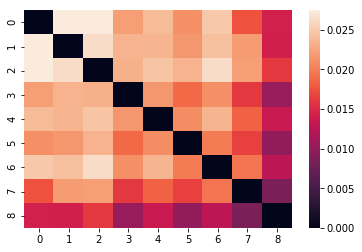

In [35]:
sns.heatmap(distance);

# Heirarchical Clustering

In [37]:
from Bio.Cluster import treecluster 
tree = treecluster(distance)
print(tree)

(8, 7): 4.42018e-05
(-1, 5): 6.60602e-05
(-2, 3): 7.94353e-05
(4, -3): 0.000119716
(6, -4): 0.000124404
(-5, 0): 0.000145431
(2, 1): 0.000154868
(-7, -6): 0.000184677


No idea what the above means.